In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
#Load the dataset
train= pd.read_csv('anneal.data') #I add the attribute name at the first line in anneal.data and anneal.test 
test=pd.read_csv('anneal.test')
train.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


In [134]:
X_drop=['shape','steel','product-type','non-ageing','surface-finish','surface-quality','enamelability','bc','bf','bt','bw/me','bl','m','chrom','phos','cbond','marvi','exptl','ferro','corr','blue/bright/varn/clean','lustre','jurofm','s','p','oil','packing','temper_rolling','condition','formability']
train=train.drop(X_drop, axis=1)
test=test.drop(X_drop,axis=1)
train.head()
train.info()
#because the id:10-32、36、38、2、3、6、7，8 has too many missing ,so I drop.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   family    798 non-null    object 
 1   carbon    798 non-null    int64  
 2   hardness  798 non-null    int64  
 3   strength  798 non-null    int64  
 4   thick     798 non-null    float64
 5   width     798 non-null    float64
 6   len       798 non-null    int64  
 7   bore      798 non-null    int64  
 8   classes   798 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 56.2+ KB


In [135]:
test.loc[test.family=='?','family']=0
train.loc[train.family=='?','family']=0
train.loc[train.family=='TN','family']=1
test.loc[test.family=='TN','family']=1
train.loc[train.family=='ZS','family']=2
test.loc[test.family=='ZS','family']=2

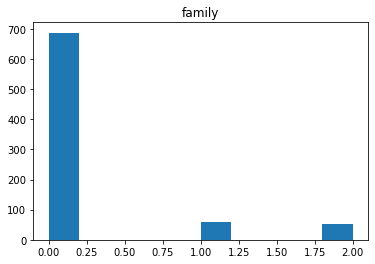

<Figure size 432x288 with 0 Axes>

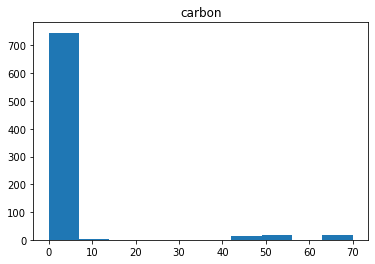

<Figure size 432x288 with 0 Axes>

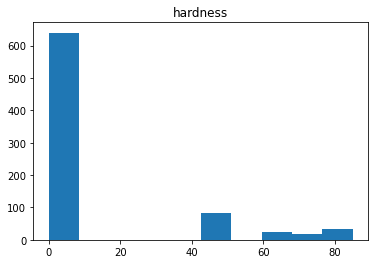

<Figure size 432x288 with 0 Axes>

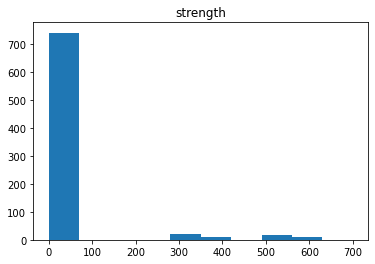

<Figure size 432x288 with 0 Axes>

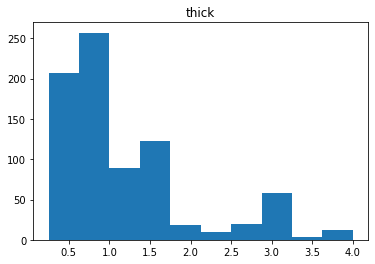

<Figure size 432x288 with 0 Axes>

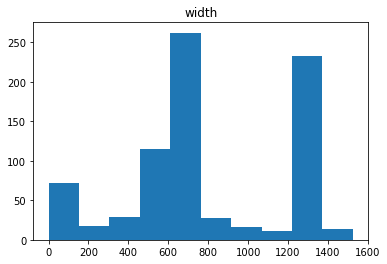

<Figure size 432x288 with 0 Axes>

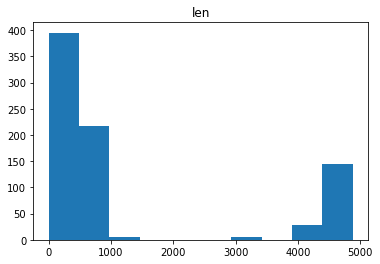

<Figure size 432x288 with 0 Axes>

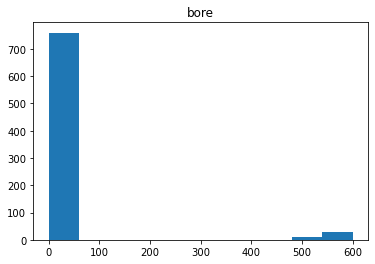

<Figure size 432x288 with 0 Axes>

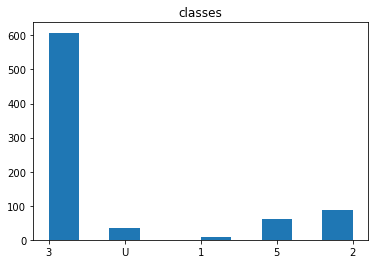

<Figure size 432x288 with 0 Axes>

In [136]:
for i in range(0,9):
    plt.figure(figsize=(6.0,4.0))
    plt.title(label=train.columns[i])
    plt.hist(train.iloc[:,i])
    plt.show()
    plt.clf()

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


x_train=train.drop('classes', axis=1)
y_train=train['classes']
m_model=MultinomialNB().fit(x_train, y_train)
x_test=test.drop('classes',axis=1).values
y_test=test['classes']
predict = m_model.predict(x_test)

print(m_model.score(x_test,y_test))

0.12


In [141]:
from sklearn.naive_bayes import GaussianNB
x_train=train.drop('classes', axis=1)
y_train=train['classes']
g_model=GaussianNB().fit(x_train, y_train)
x_test=test.drop('classes',axis=1).values
y_test=test['classes']
predict = g_model.predict(x_test)

print(g_model.score(x_test,y_test))

0.33


In [142]:
from sklearn.naive_bayes import BernoulliNB

x_train=train.drop('classes', axis=1)
y_train=train['classes']
b_model=BernoulliNB().fit(x_train, y_train)
x_test=test.drop('classes',axis=1).values
y_test=test['classes']
predict = b_model.predict(x_test)

print(b_model.score(x_test,y_test))


0.77
